In [96]:
import theano
import lasagne
import numpy as np
from theano import tensor as T
from utils import load_mnist, iterate_minibatches
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [97]:
import os
import gzip
import numpy as np
from scipy import io
import cPickle as pickle

X_train, y_train, shape = load_mnist()

In [98]:
print u'Размер трейна картинки x число каналов x высота x ширина', X_train.shape 

Размер трейна картинки x число каналов x высота x ширина (60000, 1, 28, 28)


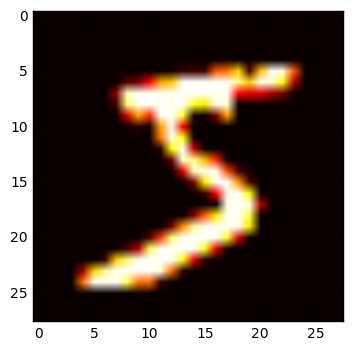

In [99]:
# Нарисуем картинку
pylab.imshow(X_train[0, 0], cmap=pylab.cm.hot)

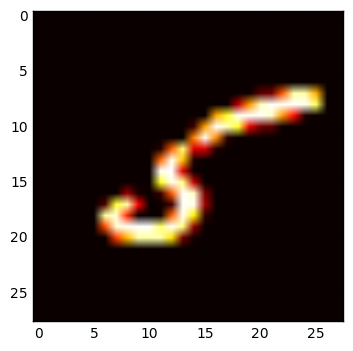

In [100]:
# Нарисуем еще одну
pylab.imshow(X_train[11, 0], cmap=pylab.cm.hot)

In [101]:
# Создадим теано переменные для объектов и ответов
input_x, target_x = T.tensor4("Input value",  dtype='float32'), T.tensor4("Target value", dtype='float32')

In [102]:
# Тут вам нужно собрать автоэнкодер, за вас написаны первый и последний слой,
# Нужно приделать к нему один или несколько средних

net = lasagne.layers.InputLayer((None, 1, 28, 28), input_x, name='Input') # Входной слой
mid = lasagne.layers.DenseLayer(net, 256)
net = lasagne.layers.DenseLayer(mid, 28*28) # Последний слой
net = lasagne.layers.ReshapeLayer(net, [[0], 1, 28, 28])

In [103]:
# Получим предсказания от сети и определим функцию хорошести предсказания, как l2 норму
predict_train = lasagne.layers.get_output(net)
loss_train = lasagne.objectives.squared_error(predict_train, target_x).mean()

In [104]:
# Получим градиенты для обучения
weights = lasagne.layers.get_all_params(net, trainable=True)
updates = lasagne.updates.adam(loss_train, weights, learning_rate=1e-4)

In [105]:
# Скомпилируем теано граф
train_func = theano.function([input_x, target_x], [loss_train], updates=updates, allow_input_downcast=True)
predi_func = theano.function([input_x], [predict_train], allow_input_downcast=True)
mid_func = theano.function([input_x], [lasagne.layers.get_output(mid)], allow_input_downcast=True)

In [106]:
for i in range(15):
    loss, num_pass = 0, 0
    for (inputs, targets) in iterate_minibatches(X_train, X_train, 100, shuffle=True):
        loss += train_func(inputs, targets)[0]
        num_pass += 1  
    print 'epoch:', i, 'loss = ', loss/num_pass, 'ok' if loss/num_pass < 0.05 else 'need to add more layers'

epoch: 0 loss =  0.0355890326451 ok
epoch: 1 loss =  0.0120850798133 ok
epoch: 2 loss =  0.00872996089583 ok
epoch: 3 loss =  0.00721619320373 ok
epoch: 4 loss =  0.00637050522007 ok
epoch: 5 loss =  0.00580025102598 ok
epoch: 6 loss =  0.00537343573886 ok
epoch: 7 loss =  0.00504379493575 ok
epoch: 8 loss =  0.00479915516741 ok
epoch: 9 loss =  0.00460656572303 ok
epoch: 10 loss =  0.00444863567437 ok
epoch: 11 loss =  0.00431829284918 ok
epoch: 12 loss =  0.0042071400045 ok
epoch: 13 loss =  0.00411375709026 ok
epoch: 14 loss =  0.0040327164256 ok


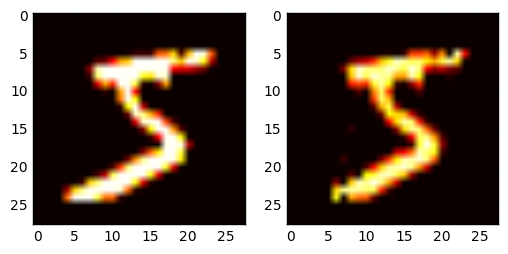

In [107]:
pylab.subplot(121)
pylab.imshow(X_train[0, 0], cmap=pylab.cm.hot)
pylab.subplot(122)
pylab.imshow(predi_func(X_train[0, 0].reshape(1, 1, 28, 28))[0][0][0], cmap=pylab.cm.hot)

In [108]:
from sklearn.manifold import TSNE

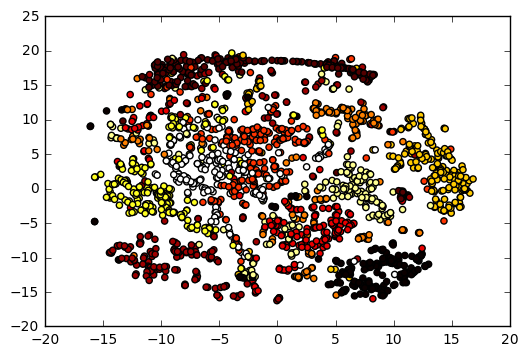

In [109]:
X_mid = mid_func(X_train)[0]
X_tsne = TSNE(n_components=2, n_iter=200).fit_transform(X_mid[:2000])
pylab.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train[:2000], cmap=pylab.cm.hot)

In [116]:
X_train_mid, y_train, X_test_mid = np.load('X_train_mid.npy'), X_train, np.load('X_test_mid.npy')


In [117]:
# В этой ячейке все тоже самое только нету части сети до mid слоя
# Вам нужно натренировать декодер
# Получить предсказания для теста (X_test_mid) и заслать решение не кегл

input_x, target_x = T.matrix("Input value",  dtype='float32'), T.tensor4("Target value", dtype='float32')
mid = lasagne.layers.InputLayer((None, 20), input_x, name='Input')
net = lasagne.layers.DenseLayer(mid, 64)
net = lasagne.layers.DenseLayer(net, 128)
net = lasagne.layers.DenseLayer(net, 256)
net = lasagne.layers.DenseLayer(net, 512)
net = lasagne.layers.DenseLayer(net,28*28)
net = lasagne.layers.ReshapeLayer(net, [[0], 1, 28, 28])

In [118]:
# Получим предсказания от сети и определим функцию хорошести предсказания, как l2 норму
predict_train = lasagne.layers.get_output(net)
loss_train = lasagne.objectives.squared_error(predict_train, target_x).mean()
# Получим градиенты для обучения
weights = lasagne.layers.get_all_params(net, trainable=True)
updates = lasagne.updates.adam(loss_train, weights, learning_rate=1e-4)
# Скомпилируем теано граф
train_func = theano.function([input_x, target_x], [loss_train], updates=updates, allow_input_downcast=True)
predi_func = theano.function([input_x], [predict_train], allow_input_downcast=True)
mid_func = theano.function([input_x], [lasagne.layers.get_output(mid)], allow_input_downcast=True)

In [119]:
for i in range(10):
    loss, num_pass = 0, 0
    for (inputs, targets) in iterate_minibatches(X_train_mid, X_train, 100, shuffle=True):
        loss += train_func(inputs, targets)[0]
        num_pass += 1  
    print 'epoch:', i, 'loss = ', loss/num_pass

epoch: 0 loss =  0.0504489784033
epoch: 1 loss =  0.0318685329702
epoch: 2 loss =  0.0295591344091
epoch: 3 loss =  0.0287210912996
epoch: 4 loss =  0.0280885339406
epoch: 5 loss =  0.0271952899706
epoch: 6 loss =  0.0268725779292
epoch: 7 loss =  0.0261437891498
epoch: 8 loss =  0.0258214542867
epoch: 9 loss =  0.0255720833397


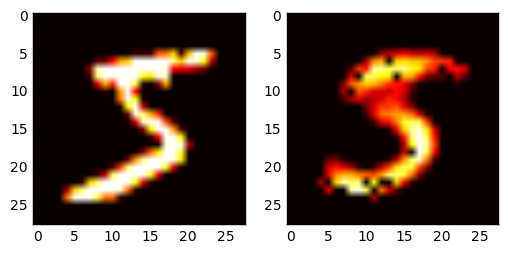

In [120]:
pylab.subplot(121)
pylab.imshow(X_train[0, 0], cmap=pylab.cm.hot)
pylab.subplot(122)
pylab.imshow(predi_func(X_train_mid[0].reshape(1, 20))[0][0][0], cmap=pylab.cm.hot)


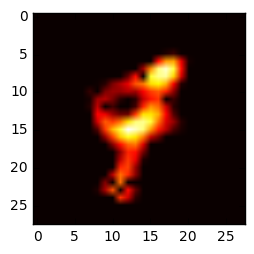

In [121]:
pylab.subplot(122)
pylab.imshow(predi_func(X_test_mid[3136].reshape(1, 20))[0][0][0], cmap=pylab.cm.hot)